In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

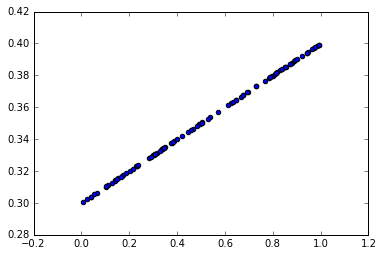

In [2]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

plt.scatter(x_data, y_data)

In [3]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [4]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [5]:
# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

In [6]:
# Launch the graph.
sess = tf.Session()
sess.run(init)

In [7]:
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

# Learns best fit is W: [0.1], b: [0.3]

(0, array([ 0.04621664], dtype=float32), array([ 0.46531835], dtype=float32))
(20, array([ 0.07293885], dtype=float32), array([ 0.31494179], dtype=float32))
(40, array([ 0.09341281], dtype=float32), array([ 0.30363712], dtype=float32))
(60, array([ 0.09839656], dtype=float32), array([ 0.30088535], dtype=float32))
(80, array([ 0.09960971], dtype=float32), array([ 0.30021551], dtype=float32))
(100, array([ 0.099905], dtype=float32), array([ 0.30005246], dtype=float32))
(120, array([ 0.09997688], dtype=float32), array([ 0.30001277], dtype=float32))
(140, array([ 0.09999438], dtype=float32), array([ 0.30000311], dtype=float32))
(160, array([ 0.09999865], dtype=float32), array([ 0.30000076], dtype=float32))
(180, array([ 0.09999969], dtype=float32), array([ 0.30000019], dtype=float32))
(200, array([ 0.09999991], dtype=float32), array([ 0.30000007], dtype=float32))


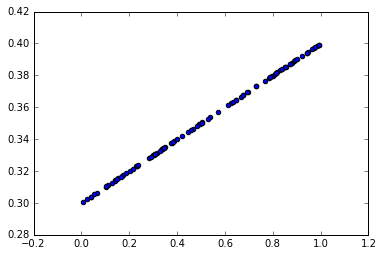

In [9]:
plt.scatter(x_data, y_data)

# MNIST tutorial

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [17]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [18]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [19]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [20]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [23]:
tf.argmax(y, 1) == tf.argmax(y_, 1)

False

In [22]:
tf.argmax(y_, 1)

<tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>

In [24]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
correct_prediction

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [25]:
tf.cast(correct_prediction, tf.float32)

<tf.Tensor 'Cast:0' shape=(?,) dtype=float32>

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9169
